In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_pickle('data_updated.pkl')

In [3]:
train_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_36,id_37,id_38,DeviceType,DeviceInfo,TransactionAmt_log,Transaction_day,P_email_domain_encoded,R_email_domain_encoded,Transaction_hour
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,4.226562,0.0,0.029538,0.020819,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,3.367188,0.0,0.043542,0.020819,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,4.078125,0.0,0.094584,0.020819,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,3.912109,0.0,0.022757,0.020819,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,3.912109,0.0,0.043542,0.020819,0.0


In [4]:
import pickle

In [5]:
with open("similar_cols.txt", "rb") as cl:   # Unpickling
    similar_cols = pickle.load(cl)

In [6]:
similar_cols

[['TransactionID', 'TransactionDT', 'TransactionAmt'],
 ['card1', 'card2', 'card3', 'card4', 'card5', 'card6'],
 ['addr1', 'addr2'],
 ['dist1', 'dist2'],
 ['P_emaildomain', 'R_emaildomain'],
 ['ProductCD'],
 ['C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14'],
 ['D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D6',
  'D7',
  'D8',
  'D9',
  'D10',
  'D11',
  'D12',
  'D13',
  'D14',
  'D15'],
 ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9'],
 ['V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34',
  'V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
  'V52',
  'V53',
  'V54',
  'V55',
  'V5

In [7]:
def print_feature_target_corr(df, feature_cols, target_col):
    if target_col not in df:
        raise KeyError(f"Target column '{target_col}' not found in DataFrame")
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise TypeError(f"Target column '{target_col}' must be numeric")

    for col in feature_cols:
        if col not in df:
            print(f"• '{col}' not in DataFrame, skipping")
            continue

        # Subset to non-null pairs
        sub = df[[col, target_col]].dropna()
        if sub.empty:
            print(f"• '{col}' has no valid data, skipping")
            continue
        if not pd.api.types.is_numeric_dtype(sub[col]):
            print(f"• '{col}' is not numeric, skipping")
            continue

        corr_val = sub[col].corr(sub[target_col])
        print(f"{col:10s} → Correlation with {target_col}: {corr_val:.4f}")


In [8]:
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

In [9]:
Card_Cols = similar_cols[1]
Card_Cols

['card1', 'card2', 'card3', 'card4', 'card5', 'card6']

In [10]:
train_data[Card_Cols]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit
...,...,...,...,...,...,...
590535,6550,NaN,150.0,visa,226.0,debit
590536,10444,225.0,150.0,mastercard,224.0,debit
590537,12037,595.0,150.0,mastercard,224.0,debit
590538,7826,481.0,150.0,mastercard,224.0,debit


In [11]:
card_num = [col for col in Card_Cols if train_data[col].dtype != 'object']

In [12]:
train_data[card_num]

,card1,card2,card3,card5
0,13926,NaN,150.0,142.0
1,2755,404.0,150.0,102.0
2,4663,490.0,150.0,166.0
3,18132,567.0,150.0,117.0
4,4497,514.0,150.0,102.0
...,...,...,...,...
590535,6550,NaN,150.0,226.0
590536,10444,225.0,150.0,224.0
590537,12037,595.0,150.0,224.0
590538,7826,481.0,150.0,224.0


In [13]:
print_feature_target_corr(train_data,train_data[card_num],'isFraud')

card1      → Correlation with isFraud: -0.0136
card2      → Correlation with isFraud: 0.0034
card3      → Correlation with isFraud: 0.1542
card5      → Correlation with isFraud: -0.0336


In [14]:
Addr_Cols = similar_cols[2]
Addr_Cols

['addr1', 'addr2']

In [15]:
def feature_engineering(df):
    data = df.copy()
    Card_Cols = similar_cols[1]
    card_num = data[Card_Cols].select_dtypes(include='number').columns
    card_cat = data[Card_Cols].select_dtypes(include='object').columns
    
    data[card_num] = data[card_num].fillna(data[card_num].median())
    data[card_cat] = data[card_cat].fillna('missing')
    
    data = pd.get_dummies(data,columns=card_cat,dtype=int)
    
    Addr_Cols = similar_cols[2]
    data[Addr_Cols] = data[Addr_Cols].fillna(data[Addr_Cols].median())
    
    dist_Cols = similar_cols[3]
    data[dist_Cols] = data[dist_Cols].fillna(data[dist_Cols].median())
    
    #D_Cols = similar_cols[7]
    #data = data[(data[D_Cols] >= 0).all(axis=1)]
    #data[D_Cols] = data[D_Cols].fillna(data[D_Cols].median())
    
    data['DeviceType'] = data['DeviceType'].fillna('unknown')
    data.drop('DeviceInfo', axis=1, inplace=True)
    data = pd.get_dummies(data, columns=['DeviceType'],dtype=int)  # drop_first is optional

    return data

In [16]:
train_data_engineered = feature_engineering(train_data)

In [17]:
train_data_engineered.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,addr1,...,card4_missing,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_missing,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown
0,2987000,0,86400,68.5,W,13926,361.0,150.0,142.0,315.0,...,0,0,0,1,0,0,0,0,0,1
1,2987001,0,86401,29.0,W,2755,404.0,150.0,102.0,325.0,...,0,0,0,1,0,0,0,0,0,1
2,2987002,0,86469,59.0,W,4663,490.0,150.0,166.0,330.0,...,0,1,0,0,1,0,0,0,0,1
3,2987003,0,86499,50.0,W,18132,567.0,150.0,117.0,476.0,...,0,0,0,0,1,0,0,0,0,1
4,2987004,0,86506,50.0,H,4497,514.0,150.0,102.0,420.0,...,0,0,0,1,0,0,0,0,1,0


In [18]:
import matplotlib.pyplot as plt

<Axes: >

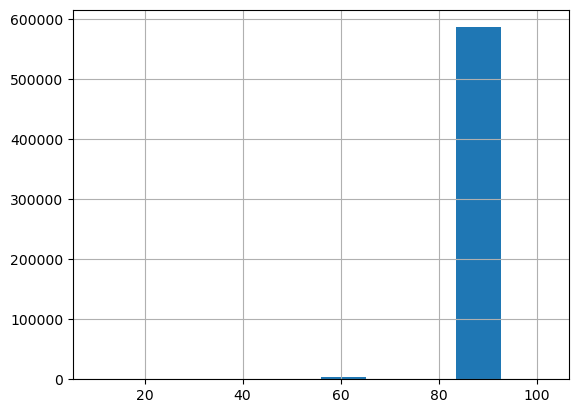

In [19]:
train_data_engineered.addr2.hist()

In [20]:
V_Cols = similar_cols[9]

In [21]:
correlated_columns = correlation(train_data_engineered[V_Cols],0.8)

In [22]:
train_data_engineered.drop(correlated_columns,axis=1,inplace=True)

In [23]:
C_Cols = similar_cols[6]
correlated_columns_c = correlation(train_data_engineered[C_Cols],0.8)

In [24]:
train_data_engineered.drop(correlated_columns_c,axis=1,inplace=True)

In [25]:
D_cols = similar_cols[7]

In [26]:
D_cols

['D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15']

In [27]:
train_data_engineered_copy = train_data_engineered.copy()

In [28]:
train_data_engineered_copy

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card5,addr1,...,card4_missing,card4_visa,card6_charge card,card6_credit,card6_debit,card6_debit or credit,card6_missing,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown
0,2987000,0,86400,68.500000,W,13926,361.0,150.0,142.0,315.0,...,0,0,0,1,0,0,0,0,0,1
1,2987001,0,86401,29.000000,W,2755,404.0,150.0,102.0,325.0,...,0,0,0,1,0,0,0,0,0,1
2,2987002,0,86469,59.000000,W,4663,490.0,150.0,166.0,330.0,...,0,1,0,0,1,0,0,0,0,1
3,2987003,0,86499,50.000000,W,18132,567.0,150.0,117.0,476.0,...,0,0,0,0,1,0,0,0,0,1
4,2987004,0,86506,50.000000,H,4497,514.0,150.0,102.0,420.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.000000,W,6550,361.0,150.0,226.0,272.0,...,0,1,0,0,1,0,0,0,0,1
590536,3577536,0,15811049,39.500000,W,10444,225.0,150.0,224.0,204.0,...,0,0,0,0,1,0,0,0,0,1
590537,3577537,0,15811079,30.953125,W,12037,595.0,150.0,224.0,231.0,...,0,0,0,0,1,0,0,0,0,1
590538,3577538,0,15811088,117.000000,W,7826,481.0,150.0,224.0,387.0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
del train_data_engineered_copy

In [30]:
print(train_data_engineered.columns.to_list())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23', 'V25', 'V27', 'V35', 'V37', 'V44', 'V46', 'V47', 'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V111', 'V112', 'V114', 'V115', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V129', 'V130', 'V131', 'V135', 'V136', 'V138', 'V139', 'V141', 'V144', 'V146', 'V148', 'V161', 'V166', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V184', 'V187', 'V188', 'V194', 'V205', 'V208', 'V209', 'V210', 'V214', 'V215', 'V220', 'V221', 'V223', 'V224', 'V226', 'V227', 'V238', '

In [31]:
similar_id_v_cols = ['^V', 'id']

similar_id_v_cols = [train_data_engineered.filter(regex=(i)).columns.to_list() for i in similar_id_v_cols]

In [32]:
V_cols = similar_id_v_cols[0]
V_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V6',
 'V7',
 'V8',
 'V10',
 'V12',
 'V14',
 'V15',
 'V19',
 'V23',
 'V25',
 'V27',
 'V35',
 'V37',
 'V44',
 'V46',
 'V47',
 'V53',
 'V55',
 'V56',
 'V61',
 'V66',
 'V75',
 'V77',
 'V78',
 'V82',
 'V86',
 'V95',
 'V98',
 'V99',
 'V104',
 'V107',
 'V108',
 'V109',
 'V111',
 'V112',
 'V114',
 'V115',
 'V117',
 'V118',
 'V120',
 'V121',
 'V122',
 'V123',
 'V124',
 'V129',
 'V130',
 'V131',
 'V135',
 'V136',
 'V138',
 'V139',
 'V141',
 'V144',
 'V146',
 'V148',
 'V161',
 'V166',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V184',
 'V187',
 'V188',
 'V194',
 'V205',
 'V208',
 'V209',
 'V210',
 'V214',
 'V215',
 'V220',
 'V221',
 'V223',
 'V224',
 'V226',
 'V227',
 'V238',
 'V240',
 'V241',
 'V250',
 'V260',
 'V270',
 'V281',
 'V282',
 'V283',
 'V284',
 'V286',
 'V288',
 'V290',
 'V291',
 'V300',
 'V305',
 'V313',
 'V314']

In [33]:
train_data_engineered[V_cols] = train_data_engineered[V_cols].fillna(train_data_engineered[V_cols].median())

In [34]:
id_cols = similar_id_v_cols[1]

In [35]:
id_cols_num = train_data_engineered[id_cols].select_dtypes(include='number').columns
id_cols_cat = train_data_engineered[id_cols].select_dtypes(include='object').columns

In [36]:
id_cols_num

Index(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32'],
      dtype='object')

In [37]:
train_data_engineered[id_cols_num] = train_data_engineered[id_cols_num].fillna(train_data_engineered[id_cols_num].median())

In [38]:
train_data_engineered[id_cols_cat] = train_data_engineered[id_cols_cat].fillna('unknown')

In [39]:
import pickle

In [40]:
print(train_data_engineered.columns.to_list())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23', 'V25', 'V27', 'V35', 'V37', 'V44', 'V46', 'V47', 'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V111', 'V112', 'V114', 'V115', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V129', 'V130', 'V131', 'V135', 'V136', 'V138', 'V139', 'V141', 'V144', 'V146', 'V148', 'V161', 'V166', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V184', 'V187', 'V188', 'V194', 'V205', 'V208', 'V209', 'V210', 'V214', 'V215', 'V220', 'V221', 'V223', 'V224', 'V226', 'V227', 'V238', '

In [41]:
product_cd_cols = similar_cols[5]
product_cd_cols

['ProductCD']

In [42]:
train_data_engineered = pd.get_dummies(train_data_engineered,columns=product_cd_cols,dtype=int)

In [43]:
print(train_data_engineered.columns.to_list())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23', 'V25', 'V27', 'V35', 'V37', 'V44', 'V46', 'V47', 'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V111', 'V112', 'V114', 'V115', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V129', 'V130', 'V131', 'V135', 'V136', 'V138', 'V139', 'V141', 'V144', 'V146', 'V148', 'V161', 'V166', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V184', 'V187', 'V188', 'V194', 'V205', 'V208', 'V209', 'V210', 'V214', 'V215', 'V220', 'V221', 'V223', 'V224', 'V226', 'V227', 'V238', 'V240', 'V241'

In [44]:
correlated_D_cols = correlation(train_data_engineered[D_cols],0.8)

In [45]:
correlated_D_cols

{'D12', 'D2', 'D6', 'D7'}

In [47]:
train_data_engineered.drop(correlated_D_cols,axis=1,inplace=True)

In [48]:
print(train_data_engineered.columns.to_list())

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C3', 'C5', 'D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V15', 'V19', 'V23', 'V25', 'V27', 'V35', 'V37', 'V44', 'V46', 'V47', 'V53', 'V55', 'V56', 'V61', 'V66', 'V75', 'V77', 'V78', 'V82', 'V86', 'V95', 'V98', 'V99', 'V104', 'V107', 'V108', 'V109', 'V111', 'V112', 'V114', 'V115', 'V117', 'V118', 'V120', 'V121', 'V122', 'V123', 'V124', 'V129', 'V130', 'V131', 'V135', 'V136', 'V138', 'V139', 'V141', 'V144', 'V146', 'V148', 'V161', 'V166', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V184', 'V187', 'V188', 'V194', 'V205', 'V208', 'V209', 'V210', 'V214', 'V215', 'V220', 'V221', 'V223', 'V224', 'V226', 'V227', 'V238', 'V240', 'V241', 'V250', 'V260', 'V270',

In [51]:
similar_D_cols = ['^(D[0-9])']

similar_D_cols = [train_data_engineered.filter(regex=(i)).columns.to_list() for i in similar_D_cols]

In [52]:
similar_D_cols

[['D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D13', 'D14', 'D15']]

In [53]:
d_cols = similar_D_cols[0]

In [54]:
train_data_engineered[d_cols] = train_data_engineered[d_cols].fillna(train_data_engineered[d_cols].median())

In [55]:
train_data_engineered.head(10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,card6_debit or credit,card6_missing,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown,ProductCD_C,ProductCD_H,ProductCD_R,ProductCD_S,ProductCD_W
0,2987000,0,86400,68.5,13926,361.0,150.0,142.0,315.0,87.0,...,0,0,0,0,1,0,0,0,0,1
1,2987001,0,86401,29.0,2755,404.0,150.0,102.0,325.0,87.0,...,0,0,0,0,1,0,0,0,0,1
2,2987002,0,86469,59.0,4663,490.0,150.0,166.0,330.0,87.0,...,0,0,0,0,1,0,0,0,0,1
3,2987003,0,86499,50.0,18132,567.0,150.0,117.0,476.0,87.0,...,0,0,0,0,1,0,0,0,0,1
4,2987004,0,86506,50.0,4497,514.0,150.0,102.0,420.0,87.0,...,0,0,0,1,0,0,1,0,0,0
5,2987005,0,86510,49.0,5937,555.0,150.0,226.0,272.0,87.0,...,0,0,0,0,1,0,0,0,0,1
6,2987006,0,86522,159.0,12308,360.0,150.0,166.0,126.0,87.0,...,0,0,0,0,1,0,0,0,0,1
7,2987007,0,86529,422.5,12695,490.0,150.0,226.0,325.0,87.0,...,0,0,0,0,1,0,0,0,0,1
8,2987008,0,86535,15.0,2803,100.0,150.0,226.0,337.0,87.0,...,0,0,0,1,0,0,1,0,0,0
9,2987009,0,86536,117.0,17399,111.0,150.0,224.0,204.0,87.0,...,0,0,0,0,1,0,0,0,0,1


In [58]:
list_of_columns_to_float64 = ['card2','card3','card5','addr','dist','^C','^(D[0-9])','^V','id']

In [59]:
list_of_columns_for_float64 = [train_data_engineered.filter(regex=(i)).columns.to_list() for i in list_of_columns_to_float64]

In [60]:
list_of_columns_for_float64

[['card2'],
 ['card3'],
 ['card5'],
 ['addr1', 'addr2'],
 ['dist1', 'dist2'],
 ['C1', 'C3', 'C5'],
 ['D1', 'D3', 'D4', 'D5', 'D8', 'D9', 'D10', 'D11', 'D13', 'D14', 'D15'],
 ['V1',
  'V2',
  'V3',
  'V4',
  'V6',
  'V7',
  'V8',
  'V10',
  'V12',
  'V14',
  'V15',
  'V19',
  'V23',
  'V25',
  'V27',
  'V35',
  'V37',
  'V44',
  'V46',
  'V47',
  'V53',
  'V55',
  'V56',
  'V61',
  'V66',
  'V75',
  'V77',
  'V78',
  'V82',
  'V86',
  'V95',
  'V98',
  'V99',
  'V104',
  'V107',
  'V108',
  'V109',
  'V111',
  'V112',
  'V114',
  'V115',
  'V117',
  'V118',
  'V120',
  'V121',
  'V122',
  'V123',
  'V124',
  'V129',
  'V130',
  'V131',
  'V135',
  'V136',
  'V138',
  'V139',
  'V141',
  'V144',
  'V146',
  'V148',
  'V161',
  'V166',
  'V169',
  'V170',
  'V171',
  'V172',
  'V173',
  'V174',
  'V175',
  'V176',
  'V184',
  'V187',
  'V188',
  'V194',
  'V205',
  'V208',
  'V209',
  'V210',
  'V214',
  'V215',
  'V220',
  'V221',
  'V223',
  'V224',
  'V226',
  'V227',
  'V238',
  'V240

In [61]:
def converting_to_float64(df, columns):
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].astype('float64')
    return df

In [68]:
flat_cols = [col for sublist in list_of_columns_for_float64 for col in sublist]

In [69]:
train_data_engineered = converting_to_float64(train_data_engineered,flat_cols)

In [71]:
train_data_engineered.card3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 590540 entries, 0 to 590539
Series name: card3
Non-Null Count   Dtype  
--------------   -----  
590540 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [72]:
pd.to_pickle(train_data_engineered,'training_data_engineered.pkl')